# Zadanie 3

In [3]:
from scipy.optimize import fmin, fminbound
import math
import random
import time
import numpy as np

In [4]:
def monteCarloIntegral(f,a,b,n):
    """ Funkcja licząca metodą Monte Carlo całkę funkcji f na przedziale (a,b) wykonując n symulacji punktów. """
    m = min(0, f(fminbound(f,a,b)))
    M = max(0, f(fminbound(lambda x: -f(x),a,b)))
    s = 0
    for _ in range(n):
        x = random.uniform(a,b)
        y = random.uniform(m,M)
        
        if y <= f(x) and y > 0:
            s += 1
        elif y >= f(x) and y < 0:
            s -= 1
    
    return s/n * (b-a)*(M-m)

In [5]:
monteCarloIntegral(math.sin, 0, math.pi, 1000)

1.9729201864543902

In [6]:
monteCarloIntegral(math.exp, 0, 1, 1000)

1.712507343880559

In [19]:
def f(x):
    return 1/(x**2)

monteCarloIntegral(f, 1, 10, 10000)

0.90809186541248665

# Zadanie 4

In [137]:
def monteCarloPi(n):
    """ Funkcja oszacowujaca liczbe pi/4 przy n losowaniach Monte Carlo. """
    points = 0
    for _ in range(n):        
        x = random.random()
        y = random.random()
        
        if x**2 + y**2 <= 1:
            points += 1
        
    return points/n

In [138]:
4*monteCarloPi(1000)

3.068

In [139]:
import matplotlib.pyplot as plt

In [140]:
def oszacowaniaPi(ns, m):
    """
    ns - lista n do sprawdzenia
    m - ilosc symulacji dla kazdego n
    ---------------------------------
    Zwraca liste usrednionych wartosc bledow dla odpowiednich n.
    """
    oszacowania = []
    for n in ns:
        rN = 0
        for _ in range(m):
            wynik = abs(monteCarloPi(n) - math.pi/4)
            rN += wynik
        oszacowania.append(rN/m)
    return oszacowania           
            

In [141]:
ns = [10,20,50,100,200,500,1000]
m = 100
oszacowania = oszacowaniaPi(ns, m)

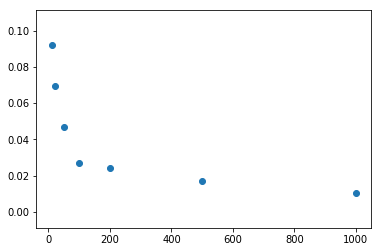

In [142]:
plt.scatter(ns,oszacowania)
plt.show()

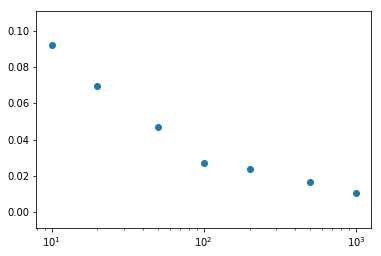

In [143]:
plt.scatter(ns, oszacowania)
plt.xscale('log')
plt.show()

# Zadanie 5

Algorytmy Monte Carlo i Las Vegas różnią się tym, że w tym pierwszym dokonujemy losowań i próbujemy dostać przybliżony wynik, natomiast w tym drugim losujemy pewne rozwiązanie i sprawdzamy czy jest ono poprawne.

In [144]:
def isSorted(lista):
    """ Funkcja pomocnicza sprawdzająca czy lista jest posortowana. """
    for i in range(len(lista)-1):
        if lista[i]>lista[i+1]:
            return False
    return True

In [145]:
def bogosort(lista):
    """ Algorytm sortujący listę za pomocą metody bogosort. """
    while not isSorted(lista):
        random.shuffle(lista)
    return lista

Sprawdzenie poprawności działania algorytmu bogosort.

In [146]:
a = [2,1,3,5,4,4]
bogosort(a)

[1, 2, 3, 4, 4, 5]

In [147]:
def testBogosort(lista,n):
    czasy = []
    for _ in range(n):
        start = time.time()
        bogosort(lista)
        czasy.append(time.time() - start)
        random.shuffle(lista)
    return czasy

Czas potrzebny na posortowanie 5-elementowej listy za pomocą algorytmu bogosort.

In [148]:
czasy = testBogosort([2,3,5,1,5], 1000)
print(np.mean(czasy))

0.000249600172043


Dodatkowy eksperyment sprawdzający czasy dla dłuższych list.

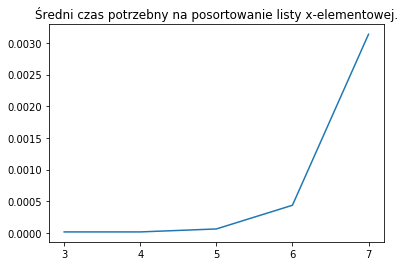

In [149]:
wyniki = []
zakres = list(range(3,8))
for i in zakres:
    lista = list(range(2,i+1))
    random.shuffle(lista)
    czasy = testBogosort(lista, 1000)
    wyniki.append(np.mean(czasy))
plt.plot(zakres,wyniki)
plt.xticks(zakres)
plt.title('Średni czas potrzebny na posortowanie listy x-elementowej.')
plt.show()

# Zadanie 6

In [150]:
def oczacowanieZbieznosciCalek(f, a, b, wynik, ns, m = 1000):
    """
    Funkcja oczacowujaca ilosc iteracji potrzebnych do zbiegania całki 
    z funkcji f na przedziale (a,b) do teoretycznego wyniku.
    ns - lista n do sprawdzenia
    m - ilosc symulacji Monte Carlo
    """
    rozniceWynikowDlaN = []
    for n in ns:
        rozniceWynikow = 0
        for _ in range(m):
            temp = abs(monteCarloIntegral(f, a, b, n) - wynik)
            rozniceWynikow += temp
        rozniceWynikowDlaN.append(rozniceWynikow/m)
    return rozniceWynikowDlaN

In [151]:
ns = [10, 50, 100, 200, 500, 1000, 2000]

Badamy szybkość zbieżności numerycznej $\int_{0}^{\pi} sin(x)\,dx$ do analitycznie wyliczonej wartości 2.

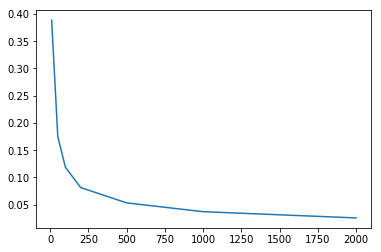

In [152]:
rozniceSin = oczacowanieZbieznosciCalek(math.sin, 0, math.pi, 2, ns)
plt.plot(ns,rozniceSin)
plt.show()

Z powyższego wykresu możemy odczytać, że przy n równym ok. 1000 otrzymujemy bardzo niewielki błąd.

Analogicznie badamy $\int_{0}^{1} e^{x}\,dx = e - 1$

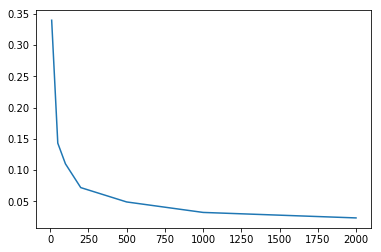

In [153]:
rozniceExp = oczacowanieZbieznosciCalek(math.exp, 0, 1, (math.exp(1)-1), ns)
plt.plot(ns, rozniceExp)
plt.show()

Z powyższego wykresu odczytujemy, że i w tym przypadku n = 1000 będzie już wystarczające.

# Zadanie 7

In [154]:
import numpy as np

def cummulativeDistribution(data, x):
    """ Counts value of empirical cummulative distribution of x. """
    return sum([1 for element in data if element < x])/len(data)

def plotECDF(data):
    dataToPlot = []
    n = len(data)
    zakres = np.linspace(1.1*min(data), 1.1*max(data), n)
    for i in zakres:
        temp = cummulativeDistribution(data, i)
        dataToPlot.append(temp)
    
    plt.scatter(zakres[1:-1], dataToPlot[:-2], s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(dataToPlot) - 1):
        x = [zakres[i], zakres[i+1]]
        y = [dataToPlot[i], dataToPlot[i]]
        plt.plot(x,y, color = 'k')
    plt.plot(zakres[-1], dataToPlot[-1])

- rozkład wykładniczy $Exp(\lambda)$

In [155]:
def exp(lam):
    return -math.log(random.random())/lam

In [156]:
def randomExp(lam, n):
    return [exp(lam) for _ in range(n)]

In [157]:
def testExpDensity(data, lam):
    """ Wykres gęstości empirycznej oraz teoretycznej. """
    x = np.linspace(exp(0.01), exp(0.99), 100)
    plt.plot(x, lam*np.exp(-lam*x), 'r-', alpha=0.6)
    
    plt.hist(data, normed = True)
    
    plt.show()

In [158]:
def testExpCDF(data, lam):
    """ Wykres dystrybuanty empirycznej oraz teoretycznej. """
    x = np.linspace(exp(0.01),exp(0.99))
    plt.plot(x, 1 - np.exp(-lam*x))
    
    plotECDF(data)
    
    plt.show()

In [159]:
from scipy.stats import expon
from statsmodels.graphics.gofplots import qqplot

def testExpQQplot(data, lam):
    data = np.array(data)
    qqplot(data, expon, scale = 1/lam, line = '45')
    plt.axis('equal')
    plt.show()

In [160]:
def testExpExVar(data, lam):
    print('Theoretical mean:', 1/lam)
    print('Experimental mean:', np.mean(data))
    print('Theoretical Var:', 1/lam**2)
    print('Experimental Var:', np.var(data))

In [161]:
def testExp(lam, n = 1000, data = None):
    if not data:
        data = randomExp(lam, n)
    testExpDensity(data, lam)
    testExpCDF(data, lam)
    testExpQQplot(data, lam)
    testExpExVar(data, lam)

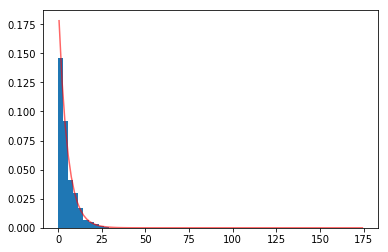

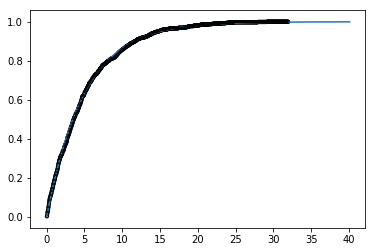

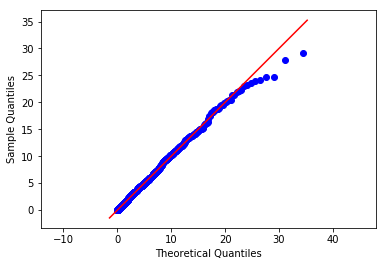

Theoretical mean: 5.0
Experimental mean: 5.00047803814
Theoretical Var: 24.999999999999996
Experimental Var: 23.3805390633


In [162]:
data = randomExp(1/5, 1000)
testExp(1/5, data = data)

In [163]:
from scipy.stats import kstest

kstest(data, 'expon')

KstestResult(statistic=0.55132672508256308, pvalue=0.0)

- rozkład normalny $N(\mu,\sigma^{2})$

In [164]:
from scipy.stats import norm

def normal(mu,sigma):
    return norm.ppf(random.random(), loc = mu, scale = sigma)

In [165]:
def randomNormal(mu,sigma,n):
    return [normal(mu,sigma) for _ in range(n)]

In [166]:
def testNormalDensity(data, mu, sigma):
    """ Wykres gęstości empirycznej oraz teoretycznej. """
    x = np.linspace(norm.ppf(0.01, loc = mu, scale = sigma), norm.ppf(0.99, loc = mu, scale = sigma), 100)
    plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), 'r-', alpha=0.6)
    
    plt.hist(data, normed = True)
    
    plt.show()

In [167]:
def testNormalCDF(data, mu, sigma):
    """ Wykres dystrybuanty empirycznej oraz teoretycznej. """
    x = np.linspace(norm.ppf(0.01, loc = mu, scale = sigma), norm.ppf(0.99, loc = mu, scale = sigma), 100)
    plt.plot(x, norm.cdf(x, loc = mu, scale = sigma))
    
    plotECDF(data)
    
    plt.show()

In [168]:
def testNormalQQplot(data, mu, sigma):
    data = np.array(data)
    qqplot(data, norm, loc = mu, scale = sigma, line = '45')
    plt.axis('equal')
    plt.show()

In [169]:
def testNormalExVar(data, mu, sigma):
    print('Theoretical mean:', norm.mean(loc = mu, scale = sigma))
    print('Experimental mean:', np.mean(data))
    print('Theoretical Var:', norm.var(loc = mu, scale = sigma))
    print('Experimental Var:', np.var(data))

In [170]:
def testNormal(mu, sigma, n = 1000, data = None):
    if not data:
        data = randomNormal(mu, sigma, n)
    testNormalDensity(data, mu, sigma)
    testNormalCDF(data, mu, sigma)
    testNormalQQplot(data, mu, sigma)
    testNormalExVar(data, mu, sigma)

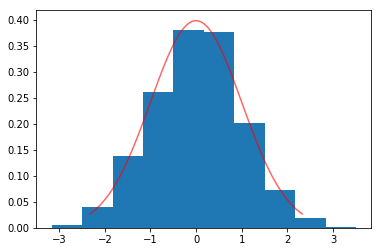

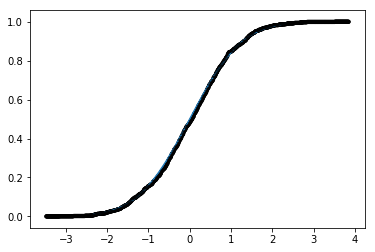

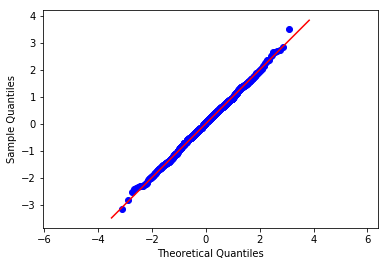

Theoretical mean: 0.0
Experimental mean: 0.0206235389211
Theoretical Var: 1.0
Experimental Var: 0.96824875961


In [186]:
data = randomNormal(0,1,1000)
testNormal(0,1, data = data)

In [191]:
from scipy.stats import normaltest

print(normaltest(data))
print(kstest(data, 'norm', args = (0,1)))

NormaltestResult(statistic=0.0084026452570595683, pvalue=0.99580749058068629)
KstestResult(statistic=0.023525925654786173, pvalue=0.63735065987634187)


- rozkład $Gamma(a,b)$, gdzie a - parametr kształtu, b - paramter skali

In [173]:
from scipy.stats import gamma

def gama(a,b):
    return gamma.ppf(random.random(), a, scale = b)

In [174]:
def randomGama(a,b,n):
    return [gama(a,b) for _ in range(n)]

In [175]:
def testGamaDensity(data, a, b):
    """ Wykres gęstości empirycznej oraz teoretycznej. """
    x = np.linspace(gamma.ppf(0.01, a, scale = b), gamma.ppf(0.99, a, scale = b), 100)
    plt.plot(x, gamma.pdf(x, a), 'r-', alpha=0.6)
    
    plt.hist(data, normed = True)
    
    plt.show()

In [176]:
def testGamaCDF(data, a, b):
    """ Wykres dystrybuanty empirycznej oraz teoretycznej. """
    x = np.linspace(gamma.ppf(0.01, a, scale = b), gamma.ppf(0.99, a, scale = b), 100)
    plt.plot(x, gamma.cdf(x, a, scale = b))
    
    plotECDF(data)
    
    plt.show()

In [177]:
def testGamaQQplot(data, a, b):
    data = np.array(data)
    qqplot(data, gamma, distargs=(a,), scale = b, line = '45')
    plt.axis('equal')
    plt.show()

In [178]:
def testGamaExVar(data, a, b):
    print('Theoretical mean:', gamma.mean(a, scale = b))
    print('Experimental mean:', np.mean(data))
    print('Theoretical Var:', gamma.var(a, scale = b))
    print('Experimental Var:', np.var(data))

In [179]:
def testGama(a, b, n = 1000, data = None):
    if not data:
        data = randomGama(a,b,n)
    testGamaDensity(data,a,b)
    testGamaCDF(data,a,b)
    testGamaQQplot(data,a,b)
    testGamaExVar(data,a,b)

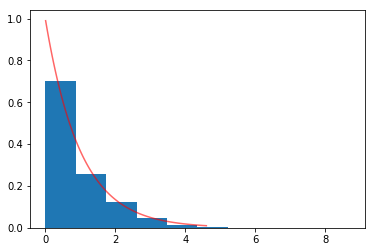

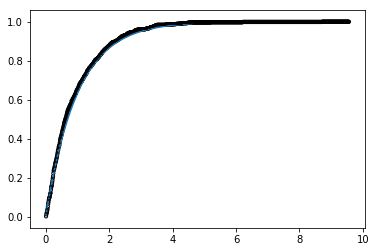

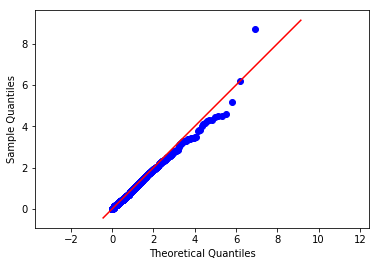

Theoretical mean: 1.0
Experimental mean: 0.930720777592
Theoretical Var: 1.0
Experimental Var: 0.864228980566


In [180]:
data = randomGama(1,1,n = 1000)
testGama(1,1, data = data)

In [181]:
x = gamma(1,scale = 1).cdf
kstest(data, 'gamma', args = (1,1))

KstestResult(statistic=0.65700000000000003, pvalue=0.0)